In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
df = pd.read_csv('telecome.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

In [7]:
def changeTotalCharge(value):
    if len(value.strip())== 0:
        return 0
    else:
        return float(value)

In [8]:
df['TotalCharges'] = df['TotalCharges'].apply(changeTotalCharge)

In [9]:
for column_data in df.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        print(column)
        print(df[column].value_counts())
        print('-'*30)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
------------------------

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

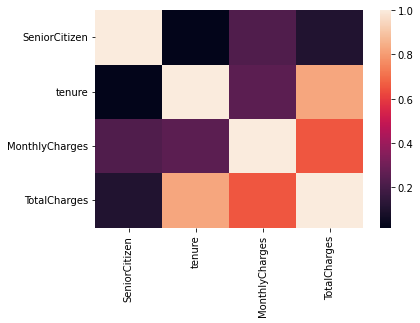

In [11]:
sns.heatmap(df.corr())

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Univariate Analysis

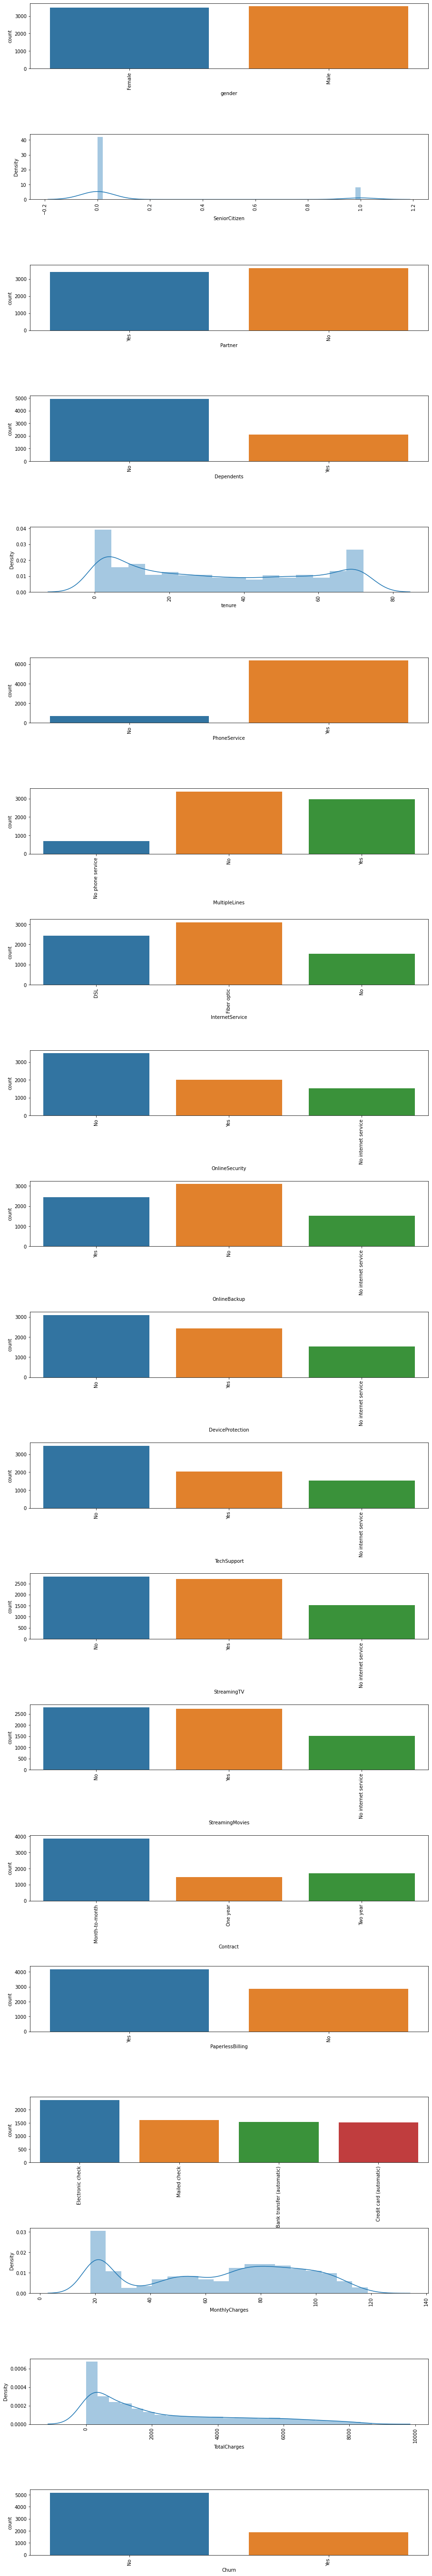

In [14]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df.dtypes.items()):
    column,dtype = column_data
    plt.subplot(40,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df[column],kde=True)

# Bivariate Analysis

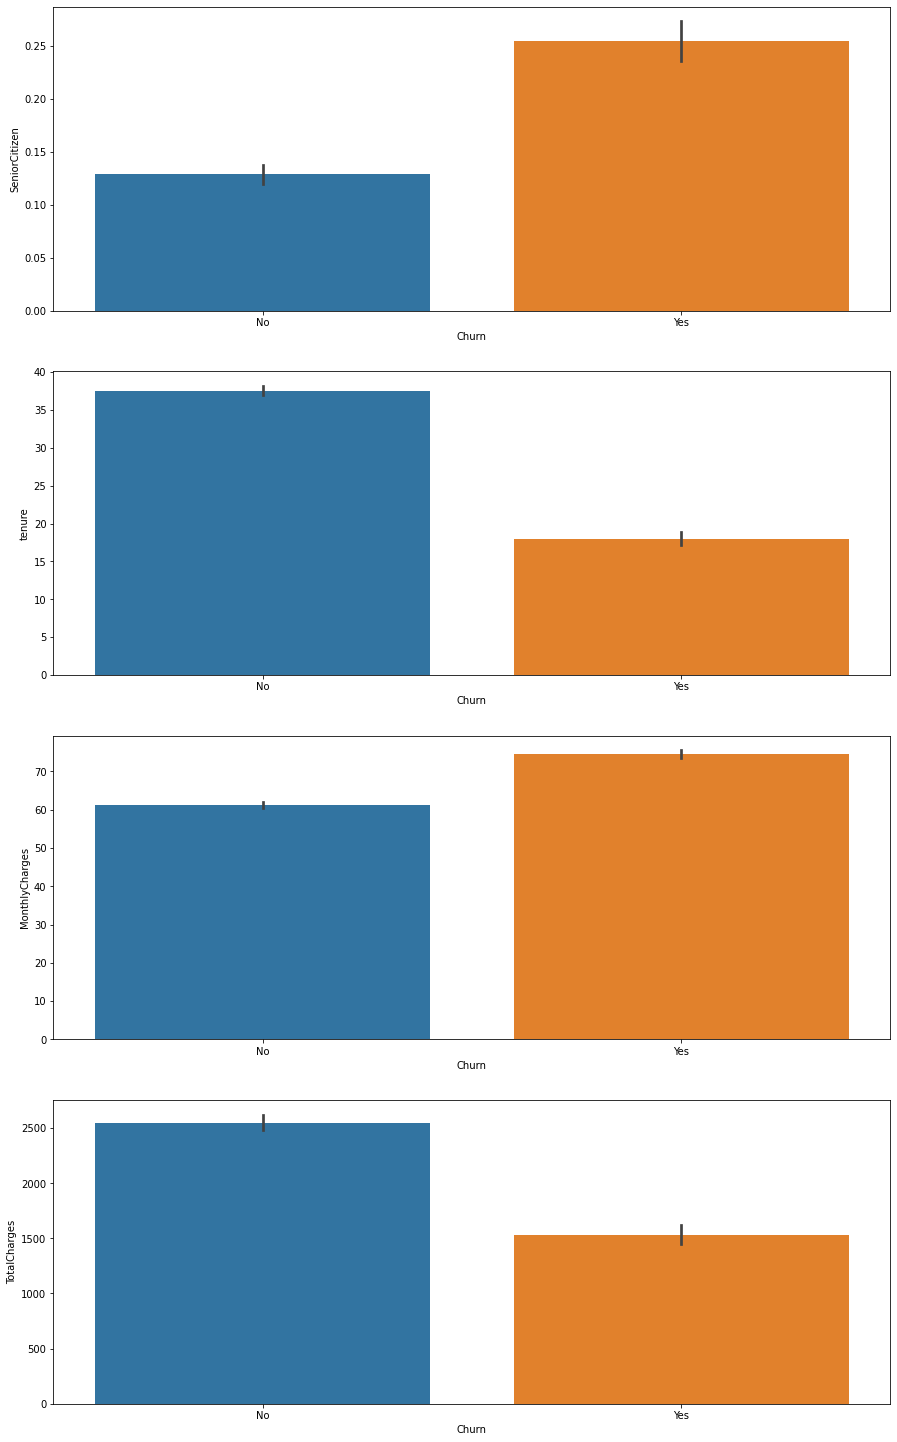

In [15]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop(['Churn'],axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)   
        sns.barplot(df['Churn'],df[column],)
        j += 1

# Checking for outliers

In [16]:
conti_column = [column[0] for column in df.dtypes.items() if column[1] != 'object' and column[1] != '<M8[ns]']

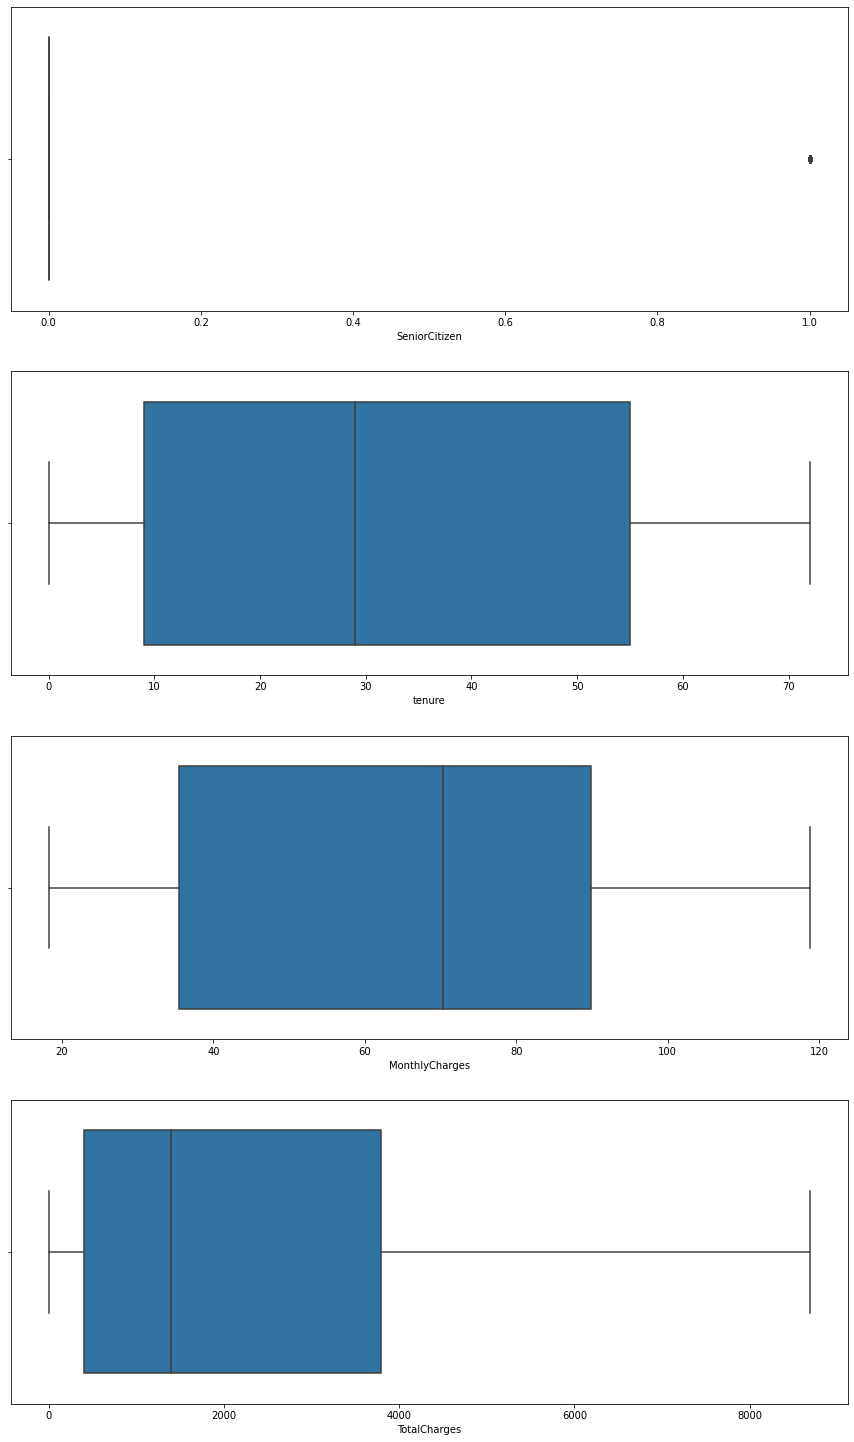

In [17]:

plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df[conti_column].dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.boxplot(df[column],)
        j += 1

# Label Encoding

In [18]:
df = df.apply(LabelEncoder().fit_transform)

# Spliting the Data

In [19]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [20]:
df.skew().abs().sort_values()

MonthlyCharges      0.014263
StreamingMovies     0.014657
gender              0.019031
StreamingTV         0.028486
TotalCharges        0.059465
Partner             0.067922
MultipleLines       0.118719
PaymentMethod       0.170129
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
PaperlessBilling    0.375396
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
Churn               1.063031
SeniorCitizen       1.833633
PhoneService        2.727153
dtype: float64

# Power Transform

In [21]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)

# Building Model

In [22]:
models = {
    'logisticRegression' : LogisticRegression(),
    'decisionTreeClassifier' : DecisionTreeClassifier(),
    'svc' : SVC(probability=True),
    'kNeighborsClassifier' : KNeighborsClassifier()
}

In [23]:
def build_model(model_obj):
    
    name, model = model_obj
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
    multi_class = False
    
    if len(y_train.value_counts()) > 2:
        multi_class = True
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
    if not multi_class:
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr , _ = metrics.roc_curve(y_test,y_pred_proba)
        auc = metrics.roc_auc_score(y_test,y_pred_proba)
    
        plt.figure(figsize=(5,5))
        plt.plot(fpr,tpr)
        plt.title('AUC ROC Curve for ' + name)
    
        print('auc: ',auc)
        plt.show()
    
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='accuracy',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(accuracy_score - mean_cv_scores)
    print('Confussion matrix: \n',confusion_matrix)
    print('\nscore: ',accuracy_score)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

----------------------------------
***** logisticRegression ******
----------------------------------
auc:  0.8609614739495632


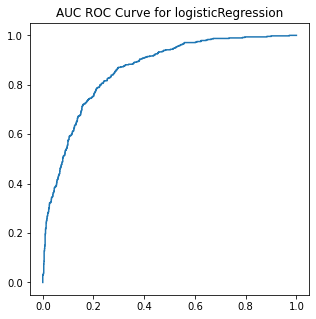

Confussion matrix: 
 [[1165  117]
 [ 222  257]]

score:  0.807495741056218
Cross Val Score:  0.8077519672436958
Cross Val std:  0.004035102618627219
Diff Between score and CV score:  0.0002562261874777816
__________________________________________
__________________________________________

----------------------------------
***** decisionTreeClassifier ******
----------------------------------
auc:  0.6661963138233252


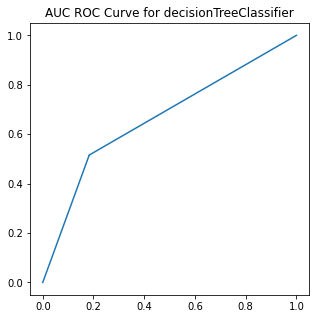

Confussion matrix: 
 [[1049  233]
 [ 234  245]]

score:  0.7348097671777399
Cross Val Score:  0.7391744435790661
Cross Val std:  0.003964130674262716
Diff Between score and CV score:  0.004364676401326206
__________________________________________
__________________________________________

----------------------------------
***** svc ******
----------------------------------
auc:  0.8115215005259917


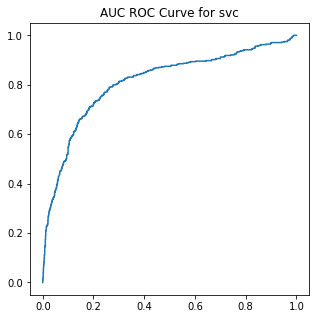

Confussion matrix: 
 [[1182  100]
 [ 252  227]]

score:  0.8001135718341851
Cross Val Score:  0.8012210423881344
Cross Val std:  0.005739447372260082
Diff Between score and CV score:  0.0011074705539493301
__________________________________________
__________________________________________

----------------------------------
***** kNeighborsClassifier ******
----------------------------------
auc:  0.7803764342640511


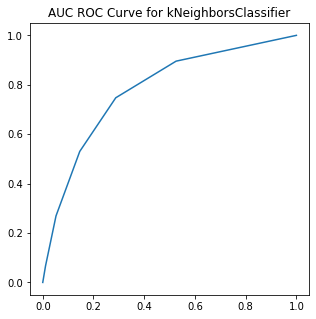

Confussion matrix: 
 [[1095  187]
 [ 225  254]]

score:  0.7660420215786485
Cross Val Score:  0.7581999033647411
Cross Val std:  0.002489037686823097
Diff Between score and CV score:  0.007842118213907456
__________________________________________
__________________________________________



In [25]:
final_model_list = []
for one_model in models.items():
    
    name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'accuracy_score': accuracy_score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })
    

# Grid search CV

In [26]:
sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['name']

'logisticRegression'

In [27]:
logisticRegression = sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['model']

In [28]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'fit_intercept' : [True, False],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100,200]
}
gridSearchCV = GridSearchCV(LogisticRegression(),param_grid=param_grid,n_jobs=-1)
gridSearchCV.fit(X_train,y_train)
print(gridSearchCV.best_score_)
print(gridSearchCV.best_params_)

0.8059407342106016
{'C': 0.01, 'fit_intercept': True, 'max_iter': 100, 'solver': 'liblinear'}


# Saving the Model

In [29]:
pickle.dump(logisticRegression,open('logisticRegression.pkl','wb'))